In [1]:
import pandas as pd
from six.moves import urllib
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Download Dataset

In [2]:
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
destination = "./loan_data/"
file_name = 'prosperLoanData.csv'

Using the below helper function I will create a new folder in my working directory. Then using the six.moves urllib request module I will download the data programatically and save to disk. Lastly, the function returns my dataframe object.

In [3]:
def fetch_data(url, path):
    if not os.path.exists(destination):
        os.makedirs(destination)
    path = os.path.join(path, file_name)
    urllib.request.urlretrieve(url, path)
    df = pd.read_csv(path)
    return df

In [58]:
data  = fetch_data(url, destination)

In [59]:
df = data.copy()

In [3]:
df = pd.read_csv("./loan_data/prosperLoanData.csv")

Quick Inspection to Verify data loaded properly

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.shape

(113937, 81)

Dataset contains 113937 rows and 81 columns. Next I will inspect the column names to get a better feel of the variables involved.

In [6]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [8]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [9]:
df.isnull().any()

ListingKey                             False
ListingNumber                          False
ListingCreationDate                    False
CreditGrade                             True
Term                                   False
LoanStatus                             False
ClosedDate                              True
BorrowerAPR                             True
BorrowerRate                           False
LenderYield                            False
EstimatedEffectiveYield                 True
EstimatedLoss                           True
EstimatedReturn                         True
ProsperRating (numeric)                 True
ProsperRating (Alpha)                   True
ProsperScore                            True
ListingCategory (numeric)              False
BorrowerState                           True
Occupation                              True
EmploymentStatus                        True
EmploymentStatusDuration                True
IsBorrowerHomeowner                    False
CurrentlyI

Check for duplicates

In [10]:
df[df.duplicated(subset = ['ListingKey', 'ListingNumber']) == True]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
5971,2EC635885737984509D5366,894748,2013-09-16 06:59:12.297000000,NaN,60,Current,NaN,0.18555,0.1620,0.1520,...,-33.14,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6385,083235967773321272C26B9,1066466,2013-12-10 13:39:07.220000000,NaN,36,Current,NaN,0.11563,0.0879,0.0779,...,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7415,5A2F35875117483773421B0,875616,2013-08-21 07:25:22.360000000,NaN,60,Current,NaN,0.24589,0.2209,0.2109,...,-32.43,0.0,0.0,0.0,0.0,1.0,0,0,0.0,75
7538,09AD35918712001025AC1BD,969821,2013-10-24 13:21:31.607000000,NaN,36,Current,NaN,0.20524,0.1685,0.1585,...,-8.41,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7555,021F3593082999771F5E621,970570,2013-11-01 13:53:22,NaN,36,Current,NaN,0.12691,0.0990,0.0890,...,-16.78,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


Confirm duplicates need to be deleted

In [11]:
df.query("ListingKey == '0A0635972629771021E38F3'")

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
998,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
57494,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [12]:
df.drop(df[df.duplicated(subset = ['ListingKey', 'ListingNumber']) == True].index, inplace = True)

Confirm duplicates were dropped

In [13]:
df[df.duplicated(subset = ['ListingKey', 'ListingNumber']) == True]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


To make data exploration more manageable, Pick a subset of features.

In [14]:
feats = ['Term', 'EmploymentStatus', 'BorrowerState', 'BorrowerAPR','BorrowerRate','InquiriesLast6Months',
        'IncomeVerifiable', 'Occupation','DebtToIncomeRatio', 'CurrentDelinquencies', 'AvailableBankcardCredit',
        'MonthlyLoanPayment', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'EstimatedReturn', 'EstimatedLoss',
        'LoanStatus', 'ProsperRating (numeric)', 'PercentFunded','BankcardUtilization',
        'CreditScoreRangeLower','CreditScoreRangeUpper']

In [15]:
sub_df = df[feats]

Using a heatmap will provide a quick overview of variable correlation

Text(0.5,1,'Correlation HeatMap')

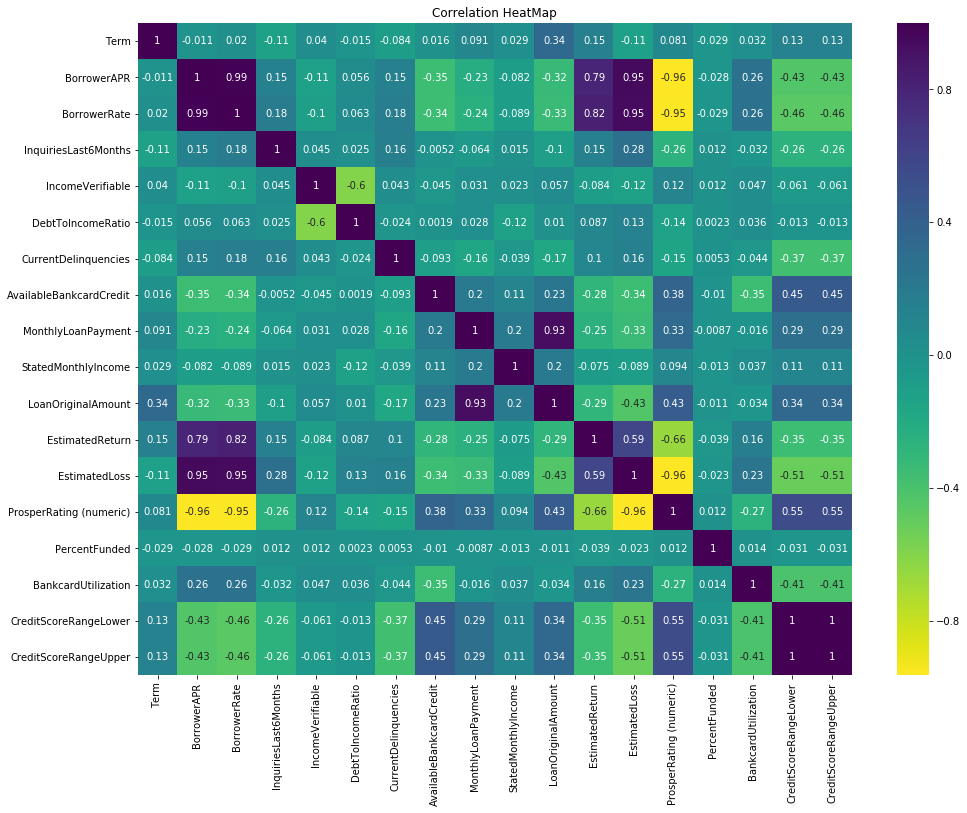

In [16]:
plt.figure(figsize = (16, 12))
sns.heatmap(sub_df.corr(), annot = True, cmap = 'viridis_r')
plt.title('Correlation HeatMap')

Based on the heatmap I will investigate features that show a strong negative or positive correlation. First I will inspect Prosper Rating vs Estimated return which has a -0.66 correlation coeffecient.

Text(0.5,1,'Prosper Rating vs Estimated Return')

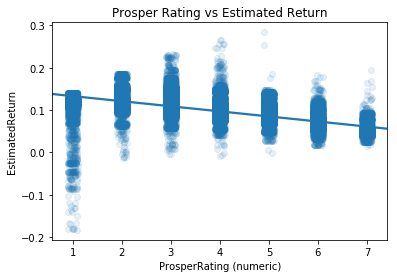

In [17]:
sns.regplot(data = sub_df, x = "ProsperRating (numeric)", y = 'EstimatedReturn', x_jitter = 0.1, 
            scatter_kws = {'alpha': 0.1})
plt.title('Prosper Rating vs Estimated Return')

In the above regression plot of Prosper Rating vs Estimated Return, we see a downward trend in expected return as the prosper score increases suggesting that borrowers make less money from customers with a higher score. This makes sense as those customers likely don't fall into traps such as late payment fees.

Next I will inspect Prosper Rating vs Estimated Loss which has a very strong negative correlation of -0.96.

Text(0.5,1,'Prosper Rating vs Estimated Loss')

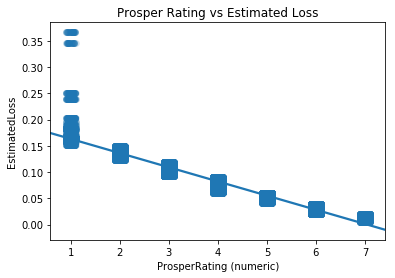

In [18]:
sns.regplot(data = sub_df, x = "ProsperRating (numeric)", y = 'EstimatedLoss', x_jitter = 0.1, 
            scatter_kws = {'alpha': 0.1})
plt.title('Prosper Rating vs Estimated Loss')

As expected there is a clear downward trend in expected loss as the Prosper Score increases though the borrower never has a estimated loss of 0 even for it's highest rated customers. Some customers with a low score of 1 are estimated to provide as high of a loss as 35%.

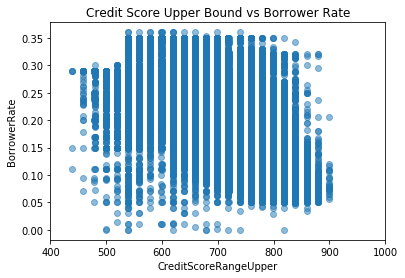

In [19]:
sns.regplot(data = sub_df, x = 'CreditScoreRangeUpper', y = 'BorrowerRate', x_jitter = 0.1, 
            scatter_kws = {'alpha': 0.5}, fit_reg = False).set(xlim = (400, 1000))
plt.title('Credit Score Upper Bound vs Borrower Rate');

We see that generally customers with a high credit score are charged lower rates. Interestingly it appears that all customers underneath a roughly 540 credit score threshold are charged a max rate of 30% while those above can be charged a higher rate of 35%.

Distribution of Credit Score Variables

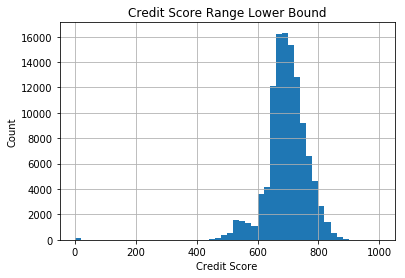

In [20]:
bins = np.arange(0, 1000 + 20, 20)
df.CreditScoreRangeLower.hist(bins = bins);
plt.title('Credit Score Range Lower Bound');
plt.ylabel("Count");
plt.xlabel("Credit Score");

Text(0.5,0,'Credit Score')

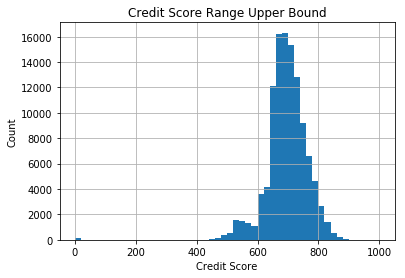

In [21]:
bins = np.arange(0, 1000 + 20, 20)
df.CreditScoreRangeUpper.hist(bins = bins)
plt.title('Credit Score Range Upper Bound')
plt.ylabel("Count")
plt.xlabel("Credit Score")

*Note that there are outliers skewing the distribution*

Combine credit score range upper and lower to average

In [22]:
df['credit_score_range_average'] = (df.CreditScoreRangeUpper + df.CreditScoreRangeLower)/2 

In [23]:
df.credit_score_range_average.describe()

count    112475.000000
mean        695.024961
std          66.635895
min           9.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: credit_score_range_average, dtype: float64

Drop outliers

In [24]:
df.drop(df.query('credit_score_range_average < 300').index, inplace = True)

Text(0.5,0,'Credit Score')

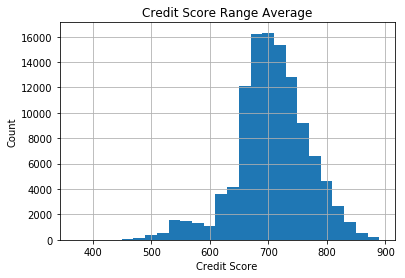

In [25]:
min_ = min(df.credit_score_range_average)
max_ = max(df.credit_score_range_average)

bins = np.arange(min_, max_ + 20, 20)
df.credit_score_range_average.hist(bins = bins)
plt.title('Credit Score Range Average')
plt.ylabel("Count")
plt.xlabel("Credit Score")

Delete Credit Score Range Upper/Lower

In [26]:
del df['CreditScoreRangeUpper']
del df['CreditScoreRangeLower']

In [27]:
df.to_csv("./clean_df.csv", index = False)

Plot Percent Funded Distribution

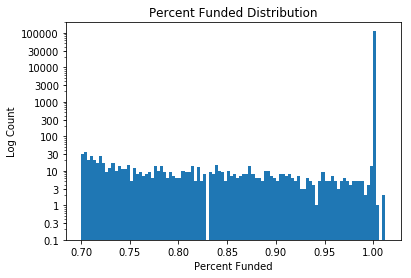

In [28]:
ticks = [0.1, 0.3, 1, 3, 10, 30, 100,300, 1000, 3000, 10000, 30000, 100000]
labs = [i for i in ticks]
plt.hist(df.PercentFunded, bins = 100);
plt.yscale('log');
plt.yticks(ticks, labs);
plt.ylabel("Log Count");
plt.xlabel("Percent Funded")
plt.title("Percent Funded Distribution");

Through the histogram we can see that the mass majority of customers do recieve their requested amount in full with a roughly evenly distrubuted amount recieving amount ranging from 70% to 99%. Also it appears some customers actually recieved slightly more than what they initially requested.

In [29]:
df.query("PercentFunded > 1")

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,credit_score_range_average
8991,02BC3555488138027BA4993,624269,2012-08-14 13:39:18.103000000,NaN,36,Current,NaN,0.15833,0.1299,0.1199,...,0.0,0.0,0.0,0.0,1.0045,0,0,0.0,186,709.5
103509,0E0F336443449038617E9F4,59,2005-12-21 19:37:33.813000000,A,36,Completed,2008-12-30 00:00:00,NaN,0.0945,0.0845,...,0.0,0.0,0.0,0.0,1.0110,0,0,0.0,14,NaN
112425,F7B735516188869510F5C6D,604229,2012-06-25 18:09:27.590000000,NaN,36,Current,NaN,0.33665,0.2969,0.2869,...,0.0,0.0,0.0,0.0,1.0125,0,0,0.0,11,629.5


Inspect relationship between Loan Status and credit score. First we will change the data type to categorical and ordinals from least to greatest.

In [30]:
df['LoanStatus'] = df['LoanStatus'].astype("category")
df['LoanStatus'].cat.set_categories(['Cancelled','Defaulted','Chargedoff','Past Due (>120 days)',
                 'Past Due (91-120 days)', 'Past Due (61-90 days)', 'Past Due (31-60 days)','Past Due (16-30 days)',
                 'Past Due (1-15 days)',  'Current', 'FinalPaymentInProgress','Completed'], ordered = True,  inplace = True)
df.sort_values(by = "LoanStatus", inplace = True)

<Figure size 432x288 with 0 Axes>

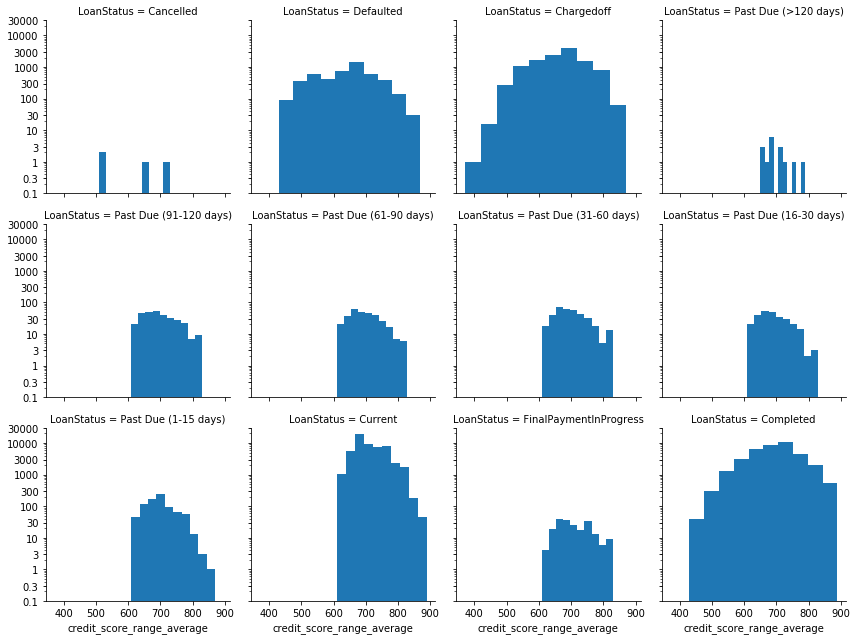

In [31]:
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
labels = [i for i in ticks]
fig = plt.figure()
grid = sns.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 4)
grid.map(plt.hist, 'credit_score_range_average').set(yscale = 'log')
grid.set(yticks = ticks, yticklabels = labels)

Now Inspect relationship between credit scores and professions. Since there are 67 total I will initially pick 8 of interest.

In [32]:
df.Occupation.value_counts()

Other                                 28394
Professional                          13529
Computer Programmer                    4440
Executive                              4280
Teacher                                3729
Administrative Assistant               3672
Analyst                                3577
Sales - Commission                     3410
Accountant/CPA                         3209
Clerical                               3127
Sales - Retail                         2773
Skilled Labor                          2714
Retail Management                      2576
Nurse (RN)                             2474
Construction                           1777
Truck Driver                           1665
Laborer                                1570
Police Officer/Correction Officer      1561
Civil Service                          1445
Engineer - Mechanical                  1396
Military Enlisted                      1265
Food Service Management                1226
Engineer - Electrical           

In [33]:
def occupation_sampler(df, professions):
    
    count = 0
    for job in professions:
        if count ==0:
            query = df.query(f"Occupation == '{job}'")
            count += 1
        else:
            query2 = df.query(f"Occupation == '{job}'")
            query = pd.concat([query, query2])
    return query

In [34]:
occupation_list = ['Attorney', 'Analyst', 'Military Enlisted', 'Scientist', 'Nurse (RN)', 'Police Officer/Correction Officer', 'Pilot - Private/Commercial', 'Architect']

In [35]:
occupation_df = occupation_sampler(df, occupation_list)

In [36]:
occupation_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,credit_score_range_average
93844,EFC7339728314574126CA8C,192360,2007-08-24 13:15:04.153000000,E,36,Defaulted,2010-08-04 00:00:00,0.23296,0.2180,0.1980,...,0.00,1418.88,1418.90,0.00,1.0,0,0,0.0,195,569.5
47515,DFEE3537699045783A8AD4A,553213,2012-01-21 12:51:24.477000000,NaN,36,Defaulted,2012-12-27 00:00:00,0.34998,0.3099,0.2999,...,0.00,1811.96,1811.96,0.00,1.0,0,0,0.0,1,609.5
11763,9EC133797838037447F658A,85570,2007-01-16 15:07:17.550000000,E,36,Defaulted,2008-04-23 00:00:00,0.18824,0.1700,0.1350,...,-204.07,776.34,699.96,603.83,1.0,0,0,0.0,32,549.5
72214,3E2C342861698078468D2F6,385800,2008-08-20 15:35:19.940000000,C,36,Defaulted,2010-03-29 00:00:00,0.23443,0.2119,0.2019,...,0.00,1094.03,1094.03,0.00,1.0,0,0,0.0,41,669.5
45622,1894340542124130959D289,231258,2007-11-13 13:48:06.793000000,B,36,Defaulted,2009-02-20 00:00:00,0.16165,0.1545,0.1445,...,-757.24,4026.20,2501.73,1145.75,1.0,0,0,0.0,75,689.5


In [37]:
def create_facet(df, cat1, quant, plot_type, row = None, order = None):
    """df = pd.DataFrame object
       cat1 = categorical variable
       quant = quantitative variable
       plot_type = type of plot to use ex. plt.hist, sns.boxplot, etc
       row = placeholder for additional categorical variable
       order = placeholder for ordering in case requirement for particular plot"""
    
    if order != None and row == None:
        grid = sns.FacetGrid(data = df, col = cat1, col_wrap = 4, row = row, size = 5, margin_titles = True)
        grid.map(plot_type, quant, orient = 'vertical', order = order)
    elif row != None:
        grid = sns.FacetGrid(data = df, col = cat1, row = row,size = 5, margin_titles = True)
        grid.map(plot_type, quant, orient = 'vertical', order = order)
                 

According to the data enlisted miltary members have the lowest average credit scores as well as 1st quartile marker boundary


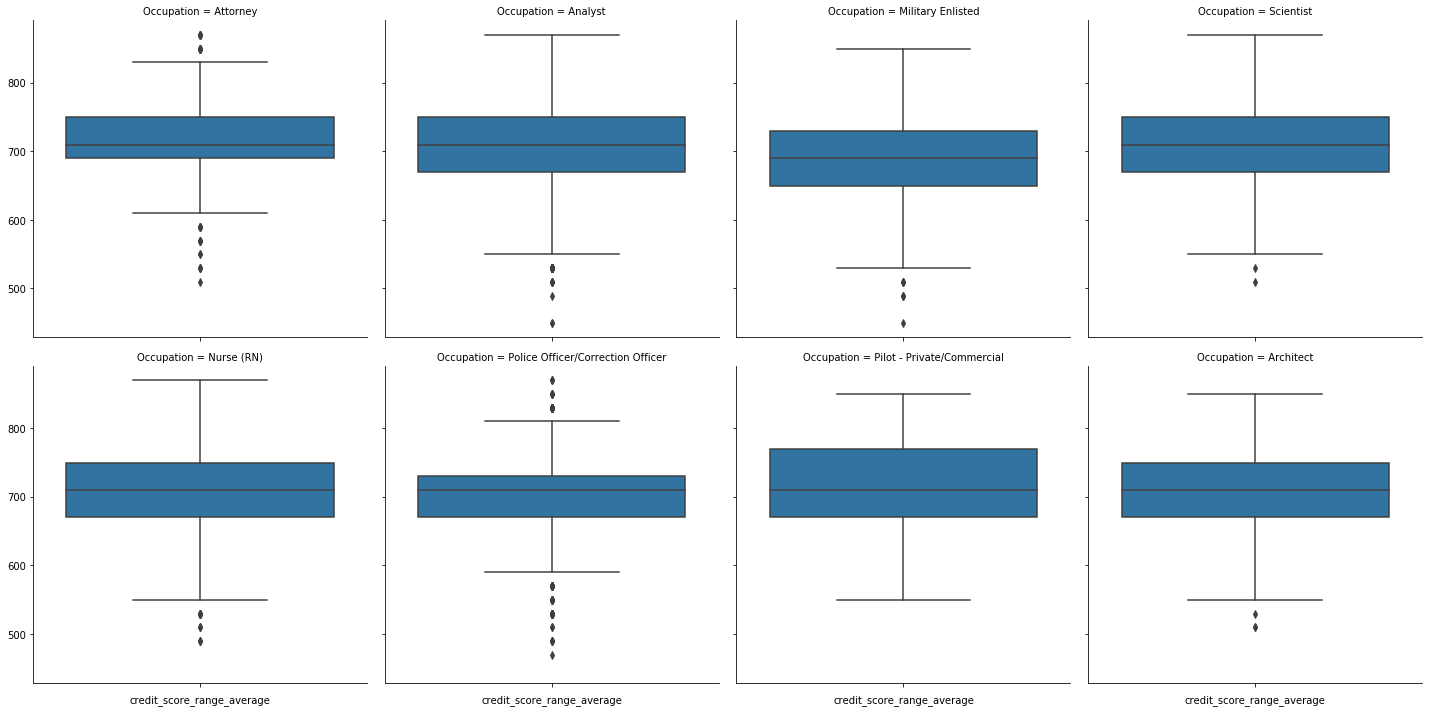

In [38]:
create_facet(occupation_df, 'Occupation', 'credit_score_range_average', sns.boxplot, order = occupation_list)
print("According to the data enlisted miltary members have the lowest average credit scores as well as 1st quartile marker boundary")

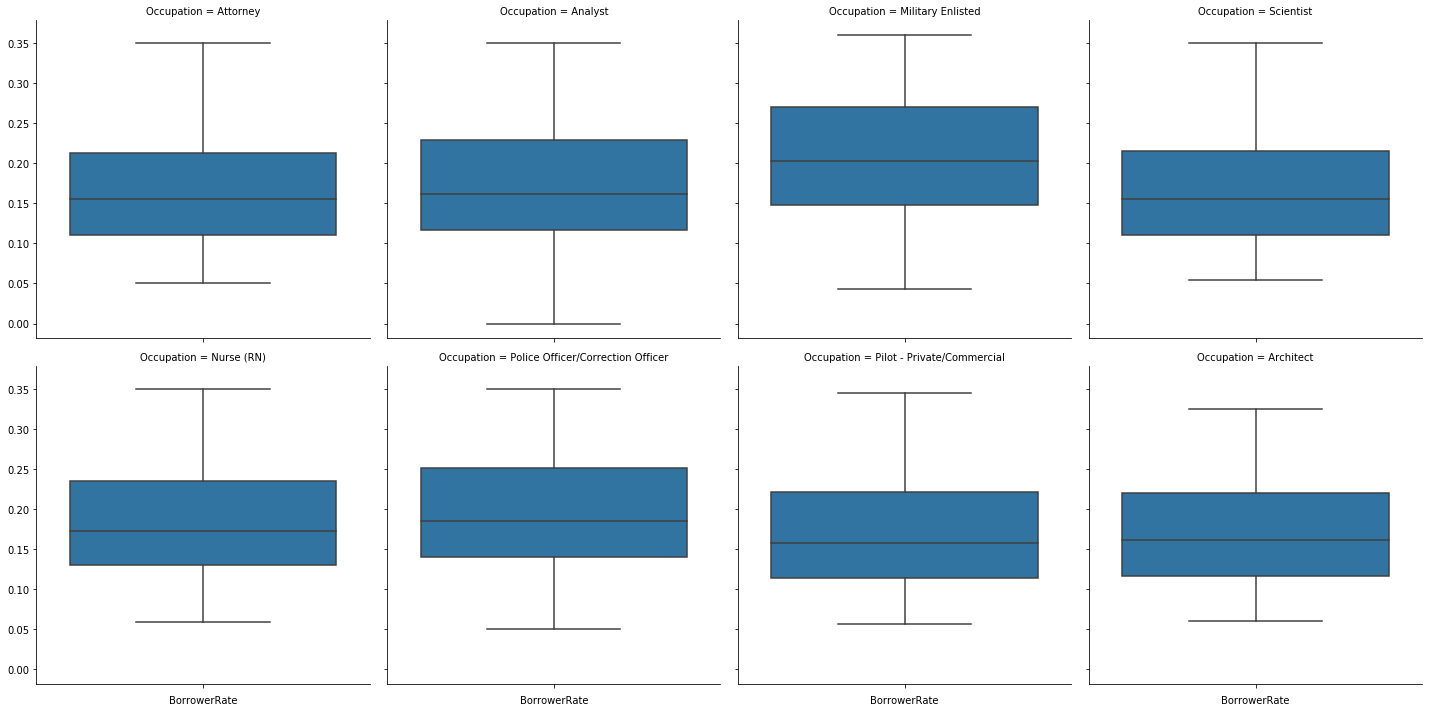

In [39]:
create_facet(occupation_df, 'Occupation', 'BorrowerRate', sns.boxplot, order = occupation_list)

Add a 3rd categorical feature and see distribution of credit scores broken down by occupation as well as Loan Status. Will reduce variables down to the lowest credit score occupation (military) and roughly highest (scientist)

In [40]:
occupation_list = ["Scientist", "Military Enlisted"]
occupation_df = occupation_sampler(df, occupation_list)
mil_sample = occupation_df.query("Occupation == 'Military Enlisted'").sample(366)
sci_df = occupation_df.query("Occupation == 'Scientist'")
mil_sci_df = pd.concat([mil_sample, sci_df])


Though the two occupations have substantial differences in average credit scores, the accounts with Current Loan 
Status standing appear to be identical


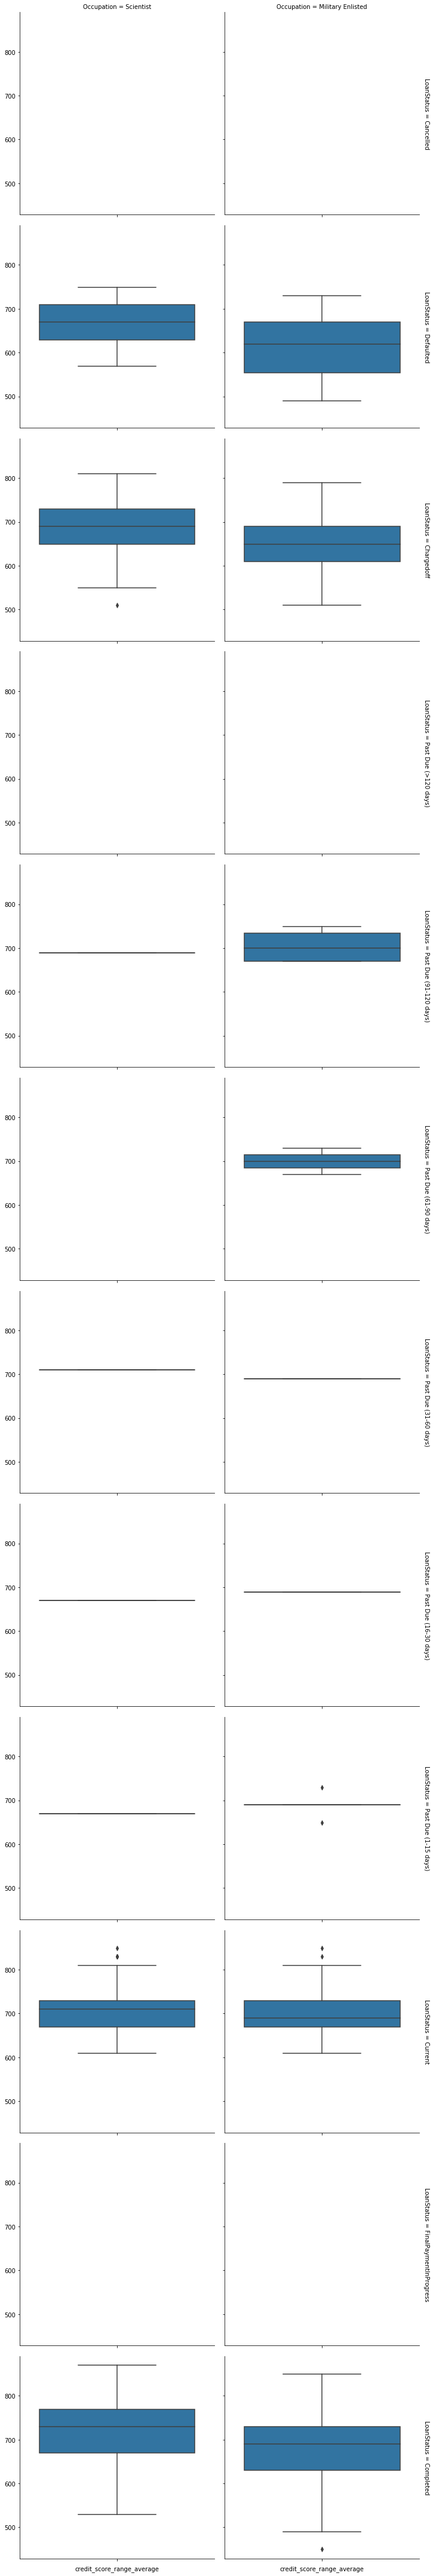

In [41]:
create_facet(occupation_df, 'Occupation', 'credit_score_range_average',sns.boxplot, order = occupation_list, row = 'LoanStatus')
print("Though the two occupations have substantial differences in average credit scores, the accounts with Current Loan \nStatus standing appear to be identical")

In [42]:
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)>

Text(0.5,1,'Scientist vs Military Enlisted Defaulted Loans')

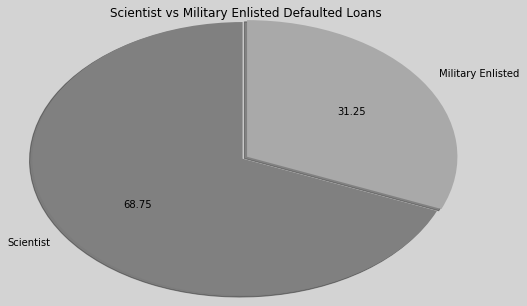

In [43]:
plt.figure(facecolor = 'lightgrey')
plt.pie(mil_sci_df.query("LoanStatus == 'Defaulted'").Occupation.value_counts(), labels = occupation_list, explode = [0.03, 0.01],  autopct = '%0.2f',shadow = True, startangle = 90,radius = np.pi/2, colors = ['grey', 'darkgrey']);
plt.title("Scientist vs Military Enlisted Defaulted Loans",pad = 32, loc = 'center', color = 'black')

Next we will investigate the same relationships for students but first we arrange the students in order from freshman to gradschool.

In [44]:
students = list(df[df.Occupation.str.contains('Student') == True].Occupation.unique())

In [45]:
student_df = occupation_sampler(df, students)
student_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,credit_score_range_average
63266,3C333373892080291935CF2,67363,2006-11-28 04:55:27.210000000,HR,36,Defaulted,2008-11-06 00:00:00,0.21857,0.2000,0.1950,...,0.00,619.00,0.00,135.97,1.0,0,0,0.0,9,509.5
45605,E79033861262157149146DD,118760,2007-04-03 21:31:09.777000000,B,36,Defaulted,2009-04-18 00:00:00,0.15100,0.1439,0.1289,...,-837.54,5216.67,3369.68,1255.01,1.0,0,0,0.0,298,689.5
14609,C1373369160592067E48715,42906,2006-09-28 09:33:16.020000000,HR,36,Defaulted,2007-10-03 00:00:00,0.27709,0.2675,0.2375,...,0.00,1795.02,1766.43,0.00,1.0,0,0,0.0,26,529.5
13647,073733836055531230EF13B,110044,2007-03-12 14:12:56.607000000,HR,36,Defaulted,2008-01-01 00:00:00,0.23448,0.2195,0.1895,...,-3.68,4592.41,4592.40,35.00,1.0,0,0,0.0,159,529.5
96490,2BDE34895593413258A0E78,467192,2010-07-19 16:23:08.853000000,NaN,36,Defaulted,2011-03-11 00:00:00,0.37453,0.3500,0.3400,...,0.00,1195.80,1195.80,0.00,1.0,0,0,0.0,47,629.5


In [46]:
student_df.Occupation.unique()

array(['Student - College Graduate Student', 'Student - Technical School',
       'Student - College Junior', 'Student - College Sophomore',
       'Student - College Freshman', 'Student - Community College',
       'Student - College Senior'], dtype=object)

In [47]:
student_df['Occupation'] = student_df['Occupation'].astype('category')
student_df['Occupation'].cat.set_categories(['Student - Community College', 'Student - Technical School',
       'Student - College Freshman', 'Student - College Sophomore',
       'Student - College Junior','Student - College Senior','Student - College Graduate Student'], ordered = True, inplace = True)
student_df.sort_values(by = 'Occupation', inplace = True)

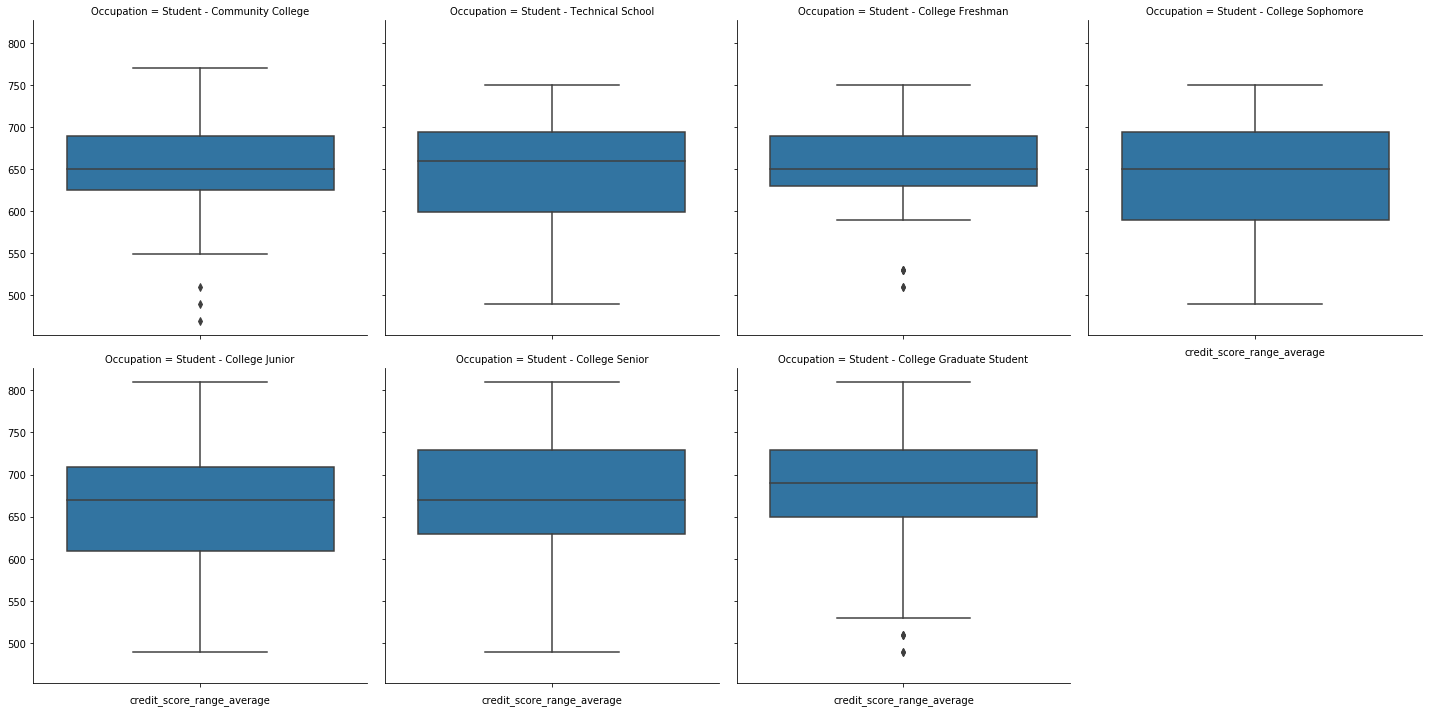

In [48]:
create_facet(student_df, 'Occupation', 'credit_score_range_average', sns.boxplot, order = students)

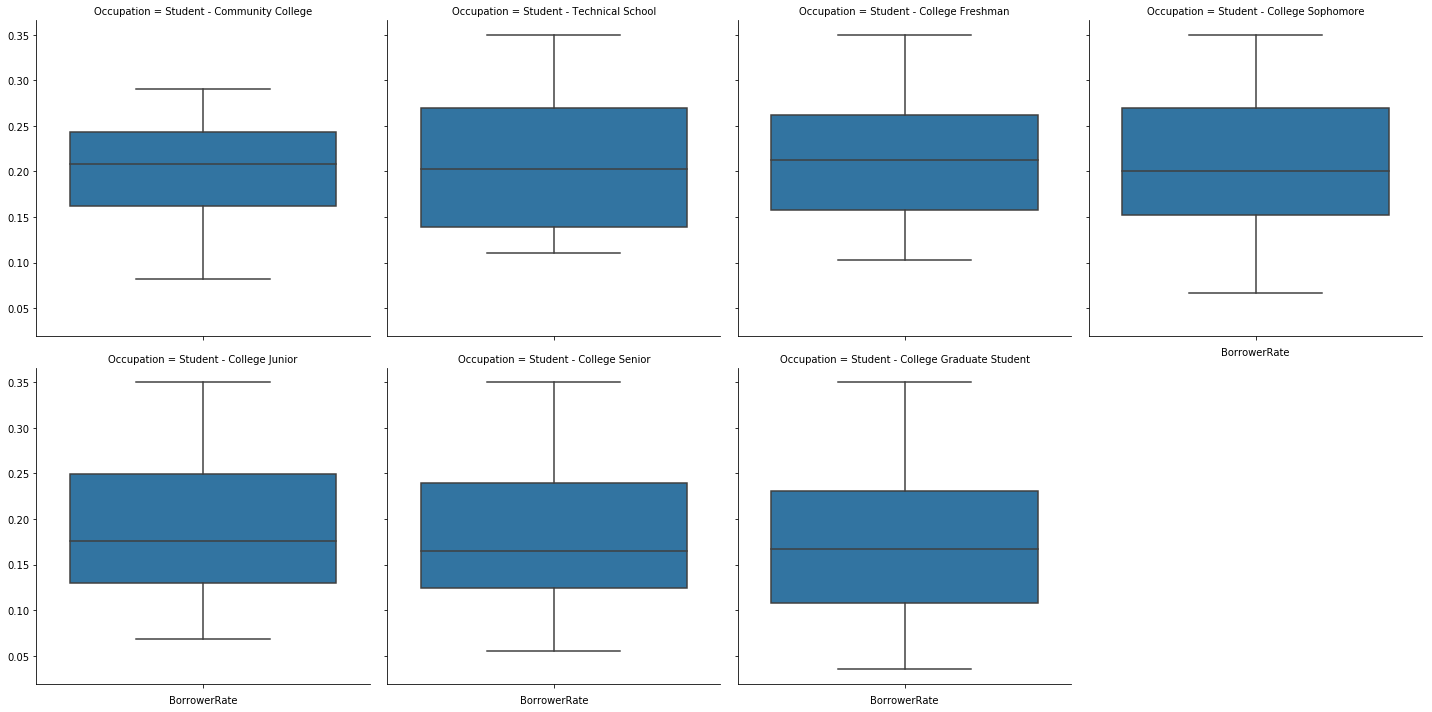

In [49]:
create_facet(student_df, 'Occupation', 'BorrowerRate', sns.boxplot, order = students)

In [50]:
students = ['Student - College Freshman', "Student - College Senior"]
student_df_samp = occupation_sampler(df, students)

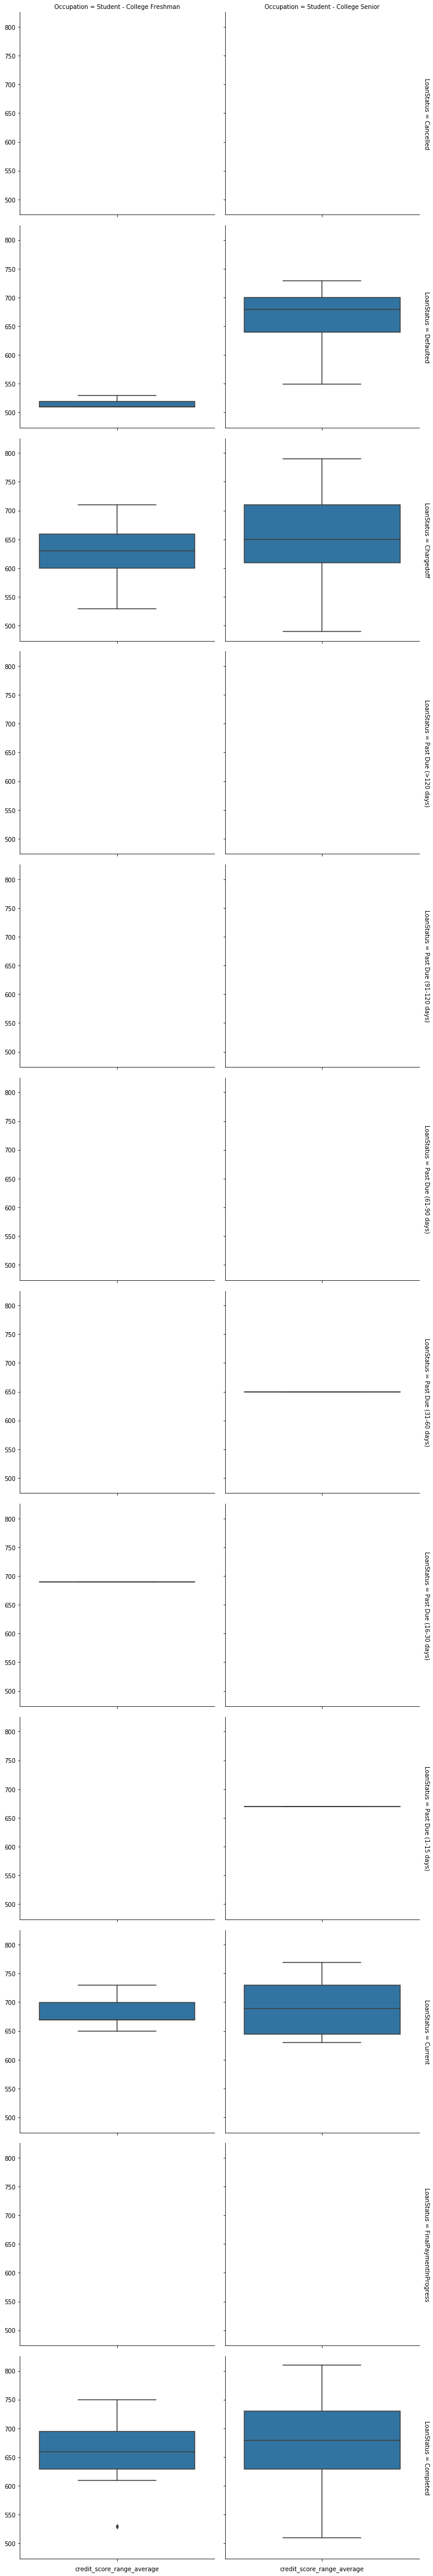

In [51]:
create_facet(student_df_samp, 'Occupation', 'credit_score_range_average', sns.boxplot, order = students, row = 'LoanStatus')

In [52]:
senior_samp = student_df_samp.query("Occupation == 'Student - College Senior'").sample(41)
freshman_samp = student_df_samp.query("Occupation == 'Student - College Freshman'")
fresh_senior_df = pd.concat([senior_samp, freshman_samp])

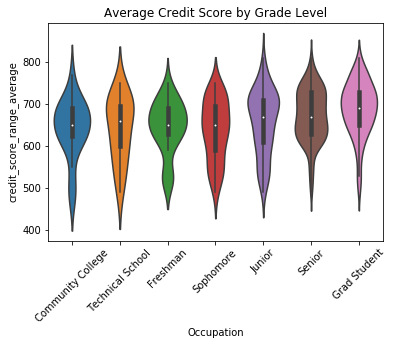

In [53]:
ticks = ['Community College', "Technical School", "Freshman", "Sophomore", "Junior", "Senior", "Grad Student"]
sns.violinplot('Occupation', "credit_score_range_average", data = student_df).set(xticklabels = (ticks))
plt.xticks(rotation = 45)
plt.title("Average Credit Score by Grade Level");

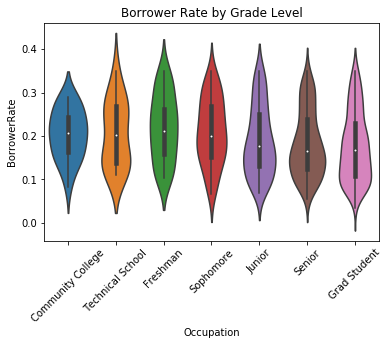

In [54]:
ticks = ['Community College', "Technical School", "Freshman", "Sophomore", "Junior", "Senior", "Grad Student"]
sns.violinplot('Occupation', "BorrowerRate", data = student_df).set(xticklabels = (ticks))
plt.xticks(rotation = 45)
plt.title("Borrower Rate by Grade Level");

In [55]:
student_df.Occupation.unique().categories

Index(['Student - Community College', 'Student - Technical School',
       'Student - College Freshman', 'Student - College Sophomore',
       'Student - College Junior', 'Student - College Senior',
       'Student - College Graduate Student'],
      dtype='object')

In [56]:
avg_freshman_default = student_df.query("Occupation == 'Student - College Freshman' & LoanStatus == 'Defaulted'").shape[0]/student_df.query("Occupation == 'Student - College Freshman'").shape[0]

In [57]:
def find_averages(df, cat, sub_cat = None):
    
    averages = []
    if sub_cat !=  None:
        for class_ in (df.Occupation.unique().categories):
            try:
                avg = df.query(f"Occupation == '{class_}' and {cat} == '{sub_cat}'").shape[0]/df.query(f"Occupation == '{class_}'").shape[0]
                averages.append(avg)
            except ZeroDivisionError:
                averages.append(0)
        return averages
    else:
        for class_ in (df.Occupation.unique().categories):
            try:
                avg = np.sum(df.query(f"Occupation == '{class_}'")[f"{cat}"])/df.query(f"Occupation == '{class_}'").shape[0]
                averages.append(avg)
            except ZeroDivisionError:
                averages.append(0)
        return averages
    

In [58]:
default_rate_avg = find_averages(student_df, 'LoanStatus', 'Defaulted')
borrow_rate_avg = find_averages(student_df, 'BorrowerRate')
credit_score_avg = find_averages(student_df, 'credit_score_range_average')
debt_to_income_avg = find_averages(student_df, 'DebtToIncomeRatio')

# Analyzing Borrower Data From the Propser Loan Dataset.

Focusing on a subset of the data including customers who are students, are we able to find statistical differences in their data and behavior?

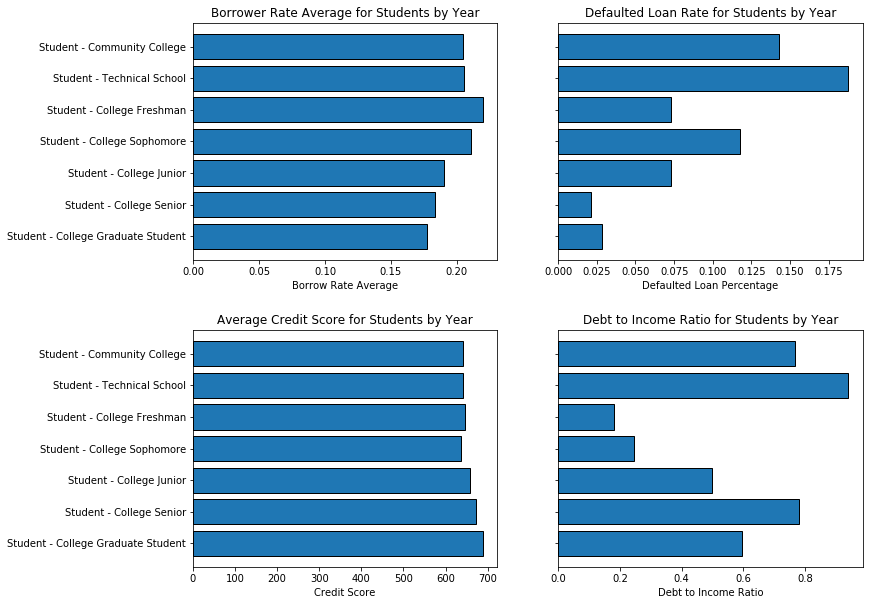

In [59]:
f, ax = plt.subplots(2, 2, sharey = True, figsize = (12., 10))
plt.subplots_adjust(hspace=0.3)
averages_list = [borrow_rate_avg[::-1], default_rate_avg[::-1], credit_score_avg[::-1],debt_to_income_avg[::-1]]
titles = ['Borrower Rate Average for Students by Year','Defaulted Loan Rate for Students by Year',
          'Average Credit Score for Students by Year','Debt to Income Ratio for Students by Year']
labels = ['Borrow Rate Average', 'Defaulted Loan Percentage', 'Credit Score', 'Debt to Income Ratio']
idx = 0

for x in range(2):
    for y in range(2):
        ax[x,y].barh(student_df.Occupation.unique().categories[::-1], averages_list[idx], edgecolor = 'black')
        ax[x,y].set_title(f"{titles[idx]}")
        ax[x,y].set_xlabel(f"{labels[idx]}")
        idx += 1


We find that students who attend a technical school have the greatest defaulted loan rate at around 18%. It also appears that borrower rates decrease as students progress through their education. At the same time debt to income ratio appears to increase starting around 18% for freshman and up to around 80% once they are seniors.

Create new column of One hot Encodings for Defaulted or not

In [60]:
student_df['defaulted'] = (student_df['LoanStatus'] == 'Defaulted') * 1

In [61]:
freshman = 'Student - College Freshman'
senior = 'Student - College Senior'

In [62]:
def hypothesis_testing(df, feature, cat,  sub_cat1, sub_cat2, sample_size, alpha, null, title = None):
    
    possible_nulls = ['=', '<=', '>=']
    diffs = []
    np.random.seed(42)
    
    if not null in possible_nulls:
        return "Null needs to be a valid equality check"
    else:
    
    
        obs_diff = (df.query(f"{cat} == '{sub_cat2}'")[f"{feature}"].mean() - 
                    df.query(f"{cat} == '{sub_cat1}'")[f"{feature}"].mean())

        for epoch in range(10000):
            sub_cat1_avg = df.query(f"{cat} == '{sub_cat1}'")[f"{feature}"].sample(sample_size, replace = True).mean()
            sub_cat2_avg = df.query(f"{cat} == '{sub_cat2}'")[f"{feature}"].sample(sample_size, replace = True).mean()
            diff = sub_cat2_avg - sub_cat1_avg
            diffs.append(diff)
        
    
        for plot in range(1):
            plt.figure(figsize=(12,10))
            simulation = np.random.normal(0, np.std(diffs), 10000)
            sns.distplot(simulation, bins = 40)
            plt.title(f"{title}")
            plt.xlabel(f"Simulated Differences in {feature} between freshman and senior college students")
            plt.legend(['0.05% alpha threshold', "observed_differences"])
    
    
            if null == ">=":
                alpha = alpha
                p_val = (simulation < obs_diff).mean()
                plt.axvline(np.percentile(simulation, alpha), linestyle = '--', color = 'r')
                plt.axvline(obs_diff, color = 'green')
                plt.legend(['0.05% alpha threshold', "observed_differences"])
                print("P-Value = ", p_val)
                return 
            elif null == "<=":
                alpha = 100 - alpha
                p_val = (simulation > obs_diff).mean()
                plt.axvline(np.percentile(simulation, alpha), linestyle = '--', color = 'r')
                plt.axvline(obs_diff, color = 'green')
                plt.legend(['0.05% alpha threshold', "observed_differences"])
                print("P-Value = ", p_val)
                return
            elif null == '=':
                alpha2 = np.percentile(simulation, 100 - (alpha/2))
                plt.axvline(np.percentile(simulation, alpha/2), linestyle = '--', color = 'r')
                plt.axvline(obs_diff, color = 'green')
                plt.axvline(np.percentile(simulation, 100 - (alpha/2)), linestyle = '--', color = 'r')
                plt.legend(['0.05% alpha threshold', "observed_differences"])
                print("P-Value = ", (simulation < obs_diff).mean() + \
                (simulation > simulation.mean() + (simulation.mean() - obs_diff)).mean())
                return

** Are the differences observed between freshman and seniors statistically significant? **

c:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


P-Value =  0.1359


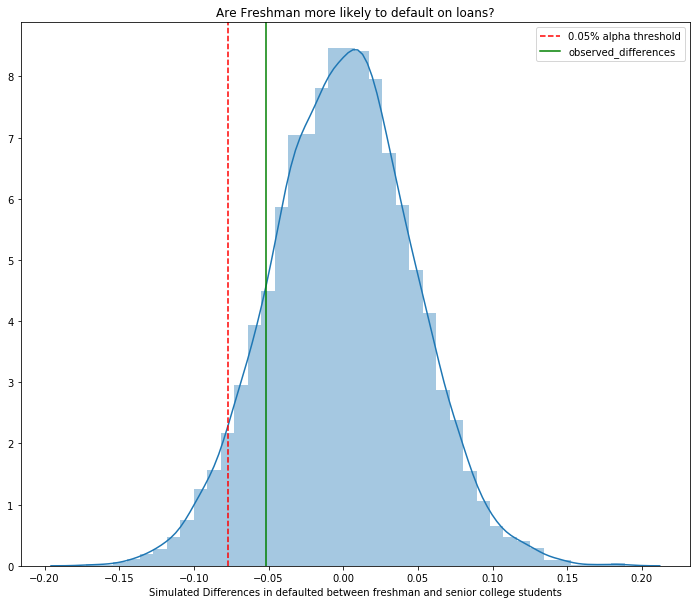

In [63]:
hypothesis_testing(student_df, 'defaulted',"Occupation", freshman, senior, 40, 5, ">=", "Are Freshman more likely to default on loans?")

Given our p-value of 0.13 we fail to reject the null hypothesis that freshman are more likely to default than seniors.

c:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


P-Value =  0.0291


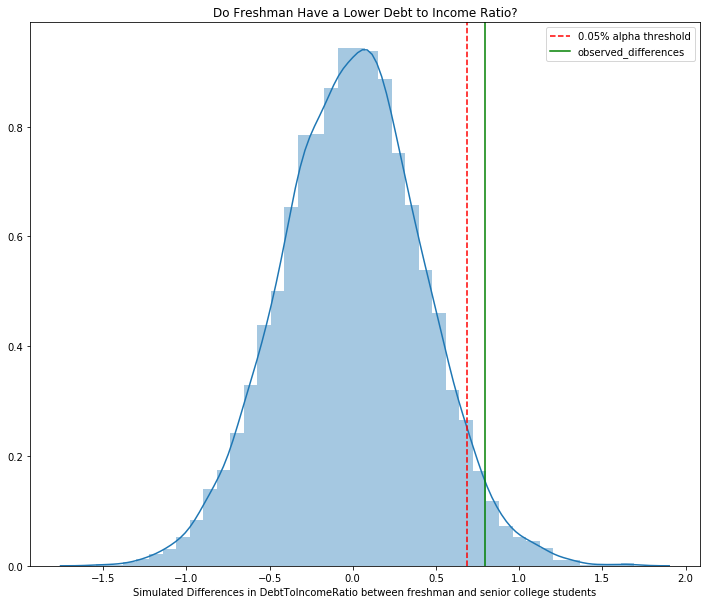

In [64]:
hypothesis_testing(student_df, 'DebtToIncomeRatio',"Occupation", freshman, senior, 40, 5, "<=", "Do Freshman Have a Lower Debt to Income Ratio?")

Given the p-value of 0.03 we reject our null hypothesis that freshman have a lower debt to income ratio.

c:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


P-Value =  0.0248


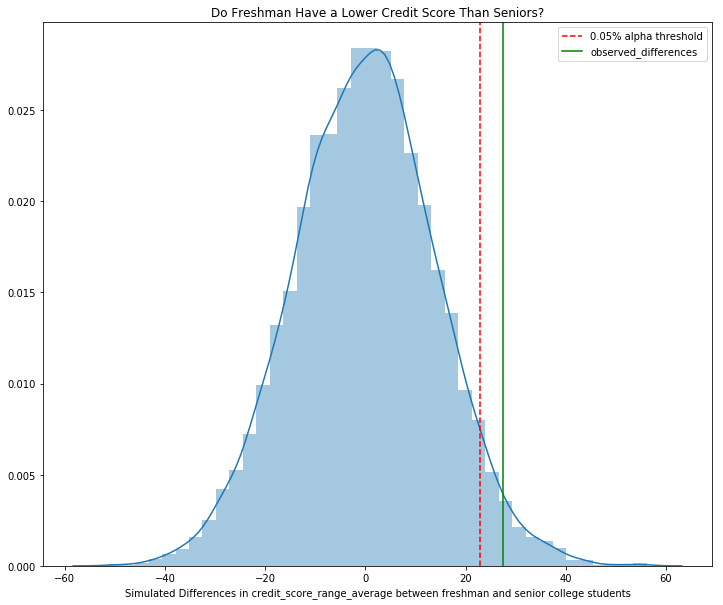

In [65]:
hypothesis_testing(student_df, 'credit_score_range_average',"Occupation", freshman, senior, 40, 5, "<=", "Do Freshman Have a Lower Credit Score Than Seniors?")

Given our p-value of 0.02 we reject our null hypothesis that freshman have worse credit scores than senior students.

c:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


P-Value =  0.03


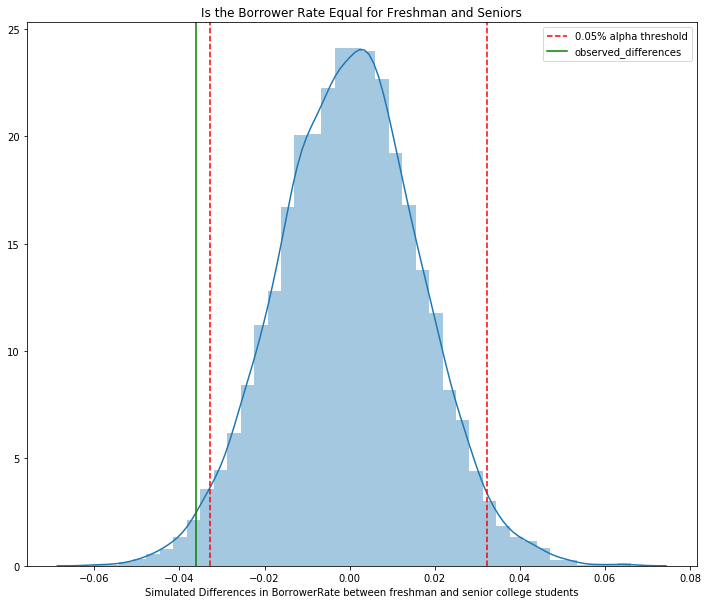

In [66]:
hypothesis_testing(student_df, 'BorrowerRate',"Occupation", freshman, senior, 40, 5, "=", "Is the Borrower Rate Equal for Freshman and Seniors")

Given our p-value of 0.03 we reject our null hypothesis that the borrower rate is equal for both freshman and seniors

Given our findings, it appears that certain features help us determine unique characteristics of certain groups of customers which would allow us to classify them into certain groups of potential risk, potential gains or possibly even identify age based on financial habits.

In [67]:
student_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,credit_score_range_average,defaulted
21386,BC0C3466047510716AB85FC,429702,2009-10-21 16:22:08.263000000,NaN,36,Completed,2012-10-18 00:00:00,0.28800,0.2490,0.2390,...,0.0,0.0,0.0,1.0,0,0,0.0,23,649.5,0
57787,08F93411317382425AFDF0E,276224,2008-02-05 14:25:56.617000000,B,36,Completed,2011-02-13 00:00:00,0.15428,0.1400,0.1300,...,0.0,0.0,0.0,1.0,0,0,0.0,276,689.5,0
15267,B34635994761857220EF118,1117742,2014-01-04 16:47:29.710000000,NaN,36,Current,NaN,0.24563,0.2080,0.1980,...,0.0,0.0,0.0,1.0,0,0,0.0,2,669.5,0
61815,73193599756473003895FB3,1138892,2014-01-16 10:30:41.443000000,NaN,36,Current,NaN,0.24563,0.2080,0.1980,...,0.0,0.0,0.0,1.0,0,0,0.0,19,669.5,0
62651,6C4235714795592014D20AB,719790,2013-02-26 08:42:22.723000000,NaN,36,Current,NaN,0.28032,0.2419,0.2319,...,0.0,0.0,0.0,1.0,0,0,0.0,87,709.5,0


In [68]:
#df = pd.read_csv("./clean_df.csv")

# Can we determine which customers will result in a defaulted or charged off loan?

First we'll take a quick glance at the differences in gains and losses between defaulted/charged off loans and money earned from completed loans in order to determine which is more valuable to the company.

In [69]:
completed_gain = df.query("LoanStatus == 'Completed'")['LP_InterestandFees']
default_loss = df.query("LoanStatus == 'Defaulted' or LoanStatus == 'ChargedOff'")['LP_NetPrincipalLoss']

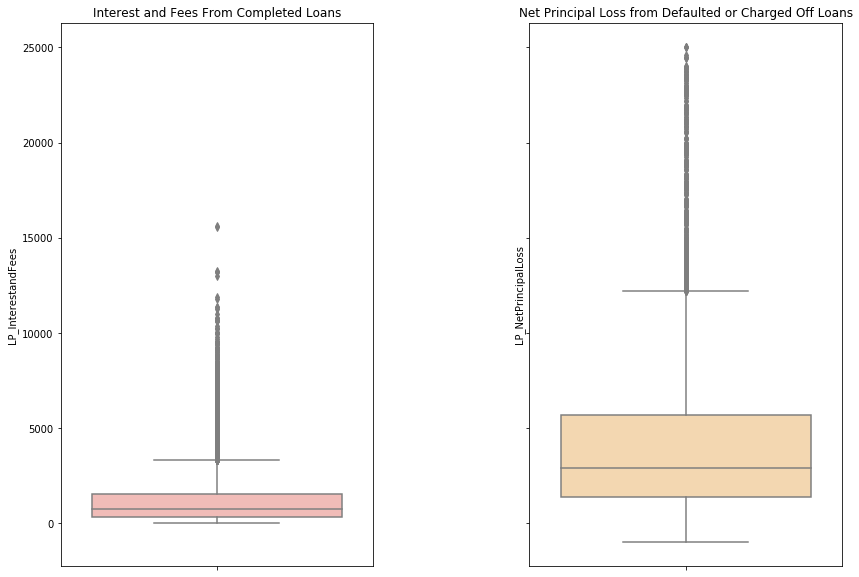

In [70]:
f, ax = plt.subplots(1,2, figsize = (14, 10), sharey = True)
plt.subplots_adjust(wspace=0.5)
sns.boxplot(completed_gain, orient = 'vertical', ax = ax[0], palette = 'Pastel1');
sns.boxplot(default_loss, orient = 'vertical', ax = ax[1], palette = "Pastel1_r");
ax[0].set_title("Interest and Fees From Completed Loans");
ax[1].set_title("Net Principal Loss from Defaulted or Charged Off Loans");

It is evident that on average losses from defaulted/charged off loans far out weigh the gains from interest and fees on completed loans. It would benefit the company if one could determine which customers will default even at the risk of potentially denying customers that will not.

What variables play the most important role in determining if a borrower will default or not?

In order to determine this we will utilize sklearns decision tree classifier which will return a ranking of feature importances representing the proportion out of 100% each feature contributes to the models decision.


First we need to prepare the data so that it can be read by the model. This will require handling of null values, converting strings to numeric as well as bool to numeric forms. First we will address numerical values.

In [71]:
def factorizer(df, features):

    for feature in features:
        feature_id, feature_name = pd.factorize(df[f"{feature}"])
        df[f"{feature}_id"] = feature_id
    return df

First we must address null values within the dataset. For numeric values we will set them to the mean of each respective column.

In [72]:
numeric_cats = []
for i in df.columns:
    if df[f"{i}"].dtype == 'float' or df[f"{i}"].dtype == 'int':
          numeric_cats.append(i)

In [73]:
for cat in numeric_cats:
    if df[f"{cat}"].isnull().any() == True:
        df[f"{cat}"].fillna(df[f"{cat}"].mean(), inplace = True)

In [74]:
df[numeric_cats].isnull().any()

BorrowerAPR                            False
BorrowerRate                           False
LenderYield                            False
EstimatedEffectiveYield                False
EstimatedLoss                          False
EstimatedReturn                        False
ProsperRating (numeric)                False
ProsperScore                           False
EmploymentStatusDuration               False
CurrentCreditLines                     False
OpenCreditLines                        False
TotalCreditLinespast7years             False
OpenRevolvingMonthlyPayment            False
InquiriesLast6Months                   False
TotalInquiries                         False
CurrentDelinquencies                   False
AmountDelinquent                       False
DelinquenciesLast7Years                False
PublicRecordsLast10Years               False
PublicRecordsLast12Months              False
RevolvingCreditBalance                 False
BankcardUtilization                    False
AvailableB

Categorical null values will be set to "Not available" as many of these values already exist in the dataset.

In [75]:
cat_feats = []

for i in df.columns:
    if (df[f"{i}"].dtype == 'object' or 
        df[f"{i}"].dtype.name == 'category'
        or df[f"{i}"].dtype == 'bool'):
          cat_feats.append(i)

In [76]:
for cat in cat_feats:
    if df[f"{cat}"].isnull().any() == True:
        df[f"{cat}"].fillna('Not available', inplace = True)

In [77]:
df[cat_feats].isnull().any()

ListingKey                 False
ListingCreationDate        False
CreditGrade                False
LoanStatus                 False
ClosedDate                 False
ProsperRating (Alpha)      False
BorrowerState              False
Occupation                 False
EmploymentStatus           False
IsBorrowerHomeowner        False
CurrentlyInGroup           False
GroupKey                   False
DateCreditPulled           False
FirstRecordedCreditLine    False
IncomeRange                False
IncomeVerifiable           False
LoanKey                    False
LoanOriginationDate        False
LoanOriginationQuarter     False
MemberKey                  False
dtype: bool

Now we will use our factorizer function to convert our categorical variables into a numeric form which can be read by the decision tree model.

In [78]:
factorized_df = factorizer(df, df[cat_feats])

Now we need to extract the newly created features that end with \_id\. We will view the columns starting at 50 as these new columns are all located at the end of the dataframe. 

In [79]:
factorized_df.columns[50:]

Index(['TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors', 'credit_score_range_average', 'ListingKey_id',
       'ListingCreationDate_id', 'CreditGrade_id', 'LoanStatus_id',
       'ClosedDate_id', 'ProsperRating (Alpha)_id', 'B

Create custom feature. Accounts either charged off or defaulted will be labeled "1" or True, accounts that have completed payment will be labeled "0" or False.

In [80]:
losses = df.query("LoanStatus == 'Chargedoff' | LoanStatus == 'Defaulted'").index
completed = df.query("LoanStatus == 'Completed'").index

Set completed loans to 0

In [81]:
factorized_df['defaults'] = 0

Set defaulted or charged off loans to 1

In [82]:
factorized_df.loc[losses, 'defaults'] = 1

Create new dataframe consisting of our new numeric representation of categorical values and append the numeric categories as well. Assign this dataframe to a variabled I'll call X. Make sure to remove any features that may leak the answer to the model such as "LoanStatus_id". (This step took repeated trials til I could narrow down these features.)

In [83]:
numeric_cats = ['BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'EmploymentStatusDuration',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'MonthlyLoanPayment',
 'PercentFunded',
 'InvestmentFromFriendsAmount',
 'credit_score_range_average']

In [84]:
X = factorized_df[['CreditGrade_id','ProsperRating (Alpha)_id', 'BorrowerState_id', 'Occupation_id',
       'EmploymentStatus_id','FirstRecordedCreditLine_id', 'IncomeRange_id','LoanOriginationQuarter_id','IsBorrowerHomeowner_id', 'CurrentlyInGroup_id',
       'IncomeVerifiable_id'] + numeric_cats]

Assign our target variable to variable "y"

In [85]:
y = df["defaults"]

We can see we are working with 51 variables

In [86]:
X.shape, y.shape

((112933, 51), (112933,))

Now we will split our data into a train and test set. The train set is what we use to train the model. The test set is set aside and used to measure how well the model performs on data which it hasn't seen before. We will use a test set size of 20% the original data.

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

Confirm we have a similar distribution of target values which we will be predicting.

In [89]:
print("Train set percentage of defaults = ",round(y_train.value_counts()[0]/y_train.value_counts()[1], 2),"%")
print("Test set percentage of defaults = ",round(y_test.value_counts()[0]/y_test.value_counts()[1], 2),"%")

Train set percentage of defaults =  5.74 %
Test set percentage of defaults =  5.44 %


Import Decision Tree Classifier from sci-kit learn

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
tree = DecisionTreeClassifier()

Fit the model on our train set

In [92]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Use model to make predictions

In [93]:
train_preds = tree.predict(x_train)
test_preds = tree.predict(x_test)

Now in order to measure how well the model performs we import accuracy_score from sci-kit learn which gives us a overall percentage of correct predictions

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
train_score = accuracy_score(train_preds, y_train)
test_score = accuracy_score(test_preds, y_test)

In [96]:
print("Train Score = ", train_score)
print("Test Score = ", test_score)

Train Score =  1.0
Test Score =  0.8218886970381193


In [97]:
test_preds[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [98]:
y_test[:20].ravel()

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

We can use the feature_importances_ function to inspect our variables and see which contribute the most to the model. It displays each variable as a percentage of contribution with a total sum of 1, or 100%

In [99]:
tree.feature_importances_

array([0.00537133, 0.12760271, 0.02843396, 0.02437212, 0.00613607,
       0.08894463, 0.0051523 , 0.0238584 , 0.00268526, 0.00261715,
       0.0010237 , 0.01720955, 0.06778842, 0.01562842, 0.0066815 ,
       0.0063128 , 0.04148409, 0.00056179, 0.00503904, 0.03646427,
       0.0160024 , 0.01302719, 0.02901415, 0.03074498, 0.01706457,
       0.0298847 , 0.00979729, 0.00946464, 0.01446567, 0.00716849,
       0.00164215, 0.02574694, 0.0248162 , 0.02482721, 0.0241982 ,
       0.01575478, 0.01192435, 0.03418637, 0.04421449, 0.00133271,
       0.00310549, 0.00389827, 0.00261943, 0.00146851, 0.00460011,
       0.00708881, 0.00574552, 0.05076829, 0.0016301 , 0.0027561 ,
       0.01767438])

Utilizing np.argsort we can sort this new array. In order to get from best to worst we will reverse the order. Also, we will limit the amount of variables to 15 to reduce model complexity.

In [100]:
best_feats = np.argsort(tree.feature_importances_, axis = 0)[::-1][:15]

In [101]:
best_feats = list(x_train.columns[best_feats])
best_feats

['ProsperRating (Alpha)_id',
 'FirstRecordedCreditLine_id',
 'BorrowerRate',
 'MonthlyLoanPayment',
 'StatedMonthlyIncome',
 'EstimatedReturn',
 'EmploymentStatusDuration',
 'DebtToIncomeRatio',
 'OpenRevolvingMonthlyPayment',
 'TotalInquiries',
 'TotalCreditLinespast7years',
 'BorrowerState_id',
 'RevolvingCreditBalance',
 'AvailableBankcardCredit',
 'BankcardUtilization']

Text(0.5,0,'Contribution')

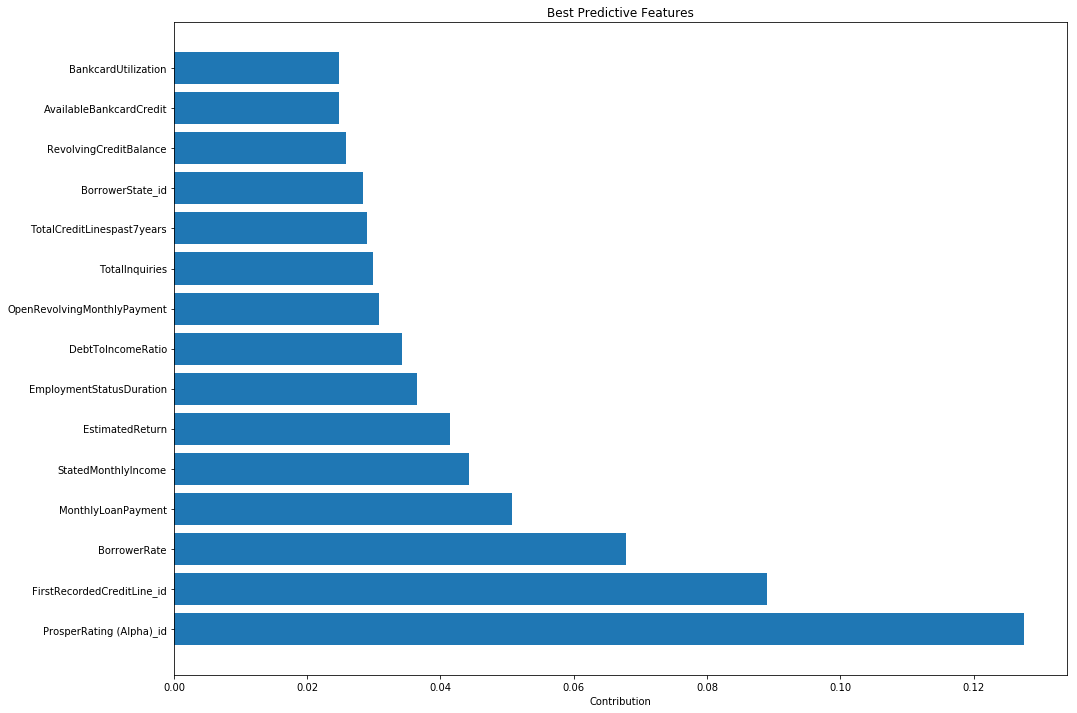

In [102]:
plt.figure(figsize = (16, 12))
plt.barh(best_feats[:16], sorted(tree.feature_importances_)[:len(tree.feature_importances_)-16:-1])
plt.title("Best Predictive Features")
plt.xlabel("Contribution")

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242B3989860>,
      dtype=object)

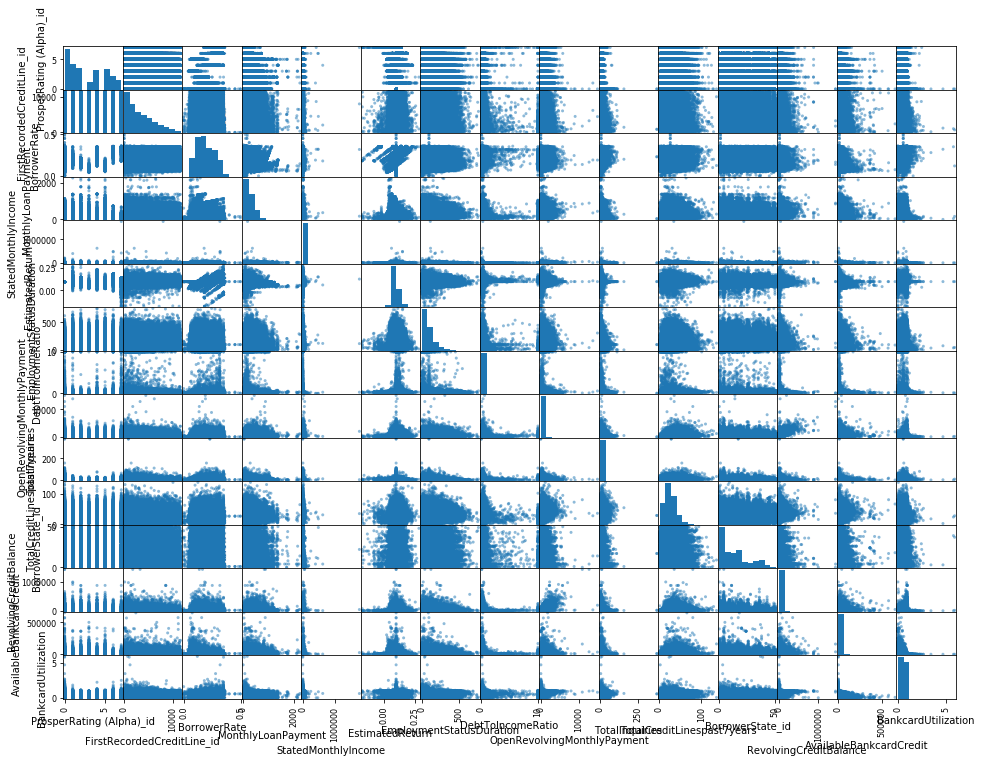

In [139]:
pd.scatter_matrix(df[best_feats], figsize = (16, 12))

We can see Propser Rating (Alpha) contributes significantly more to determining if a customer will default or not with over 13% of contribution to the decision tree. Followed by BorrowerRate at 7%, Monthly Loan Payment at around 5%.

**Honing in on these top 3 predictive features.**

**1. Visualize PropserRating and Default counts**

In [103]:
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype('category')
df['ProsperRating (Alpha)'].cat.set_categories(['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered = True, inplace = True)


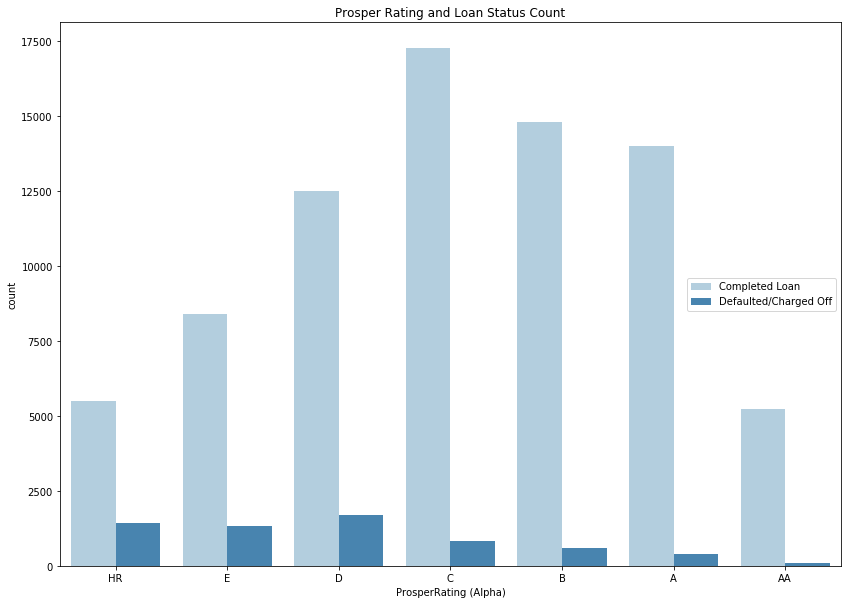

In [104]:
plt.figure(figsize = (14, 10))
sns.countplot(df['ProsperRating (Alpha)'], hue = df['defaults'], palette = 'Blues', order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']);
plt.title("Prosper Rating and Loan Status Count")
plt.legend(["Completed Loan", "Defaulted/Charged Off"], loc = 'center right')

We can see that the completed loans take on a near gaussian distribution with the majority being in the C rating. Meanwhile as the Prosper Rating gets higher on the scale, the amount of defaulted or charged off loans show a downward trend with the least amount at the highest (AA) rating.

**2. Borrower Rate for Customers That Completed Their Loans vs Customers That Defaulted**

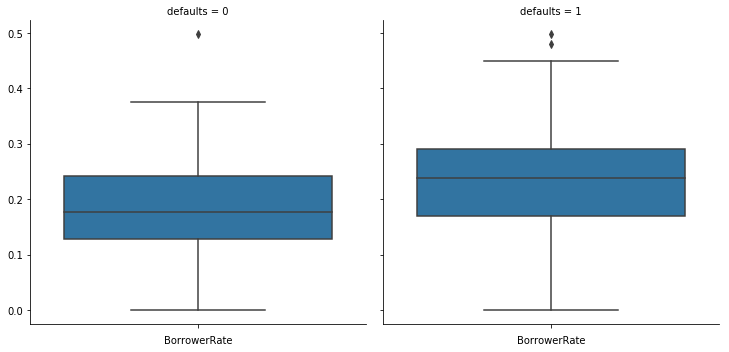

In [105]:
create_facet(df, 'defaults', 'BorrowerRate', sns.boxplot, order = 'defaults')

We can see that there is a higher mean borrower rate for the defaulted or charged off loans at rough 25% while the borrower rate for completed loans has a mean of roughly 18%. Also, the 3rd quartile boundary is roughly 5% higher for defaulted loans.

**3. Monthly Payments of Customers Who Defaulted vs Customers Who Default.**

c:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


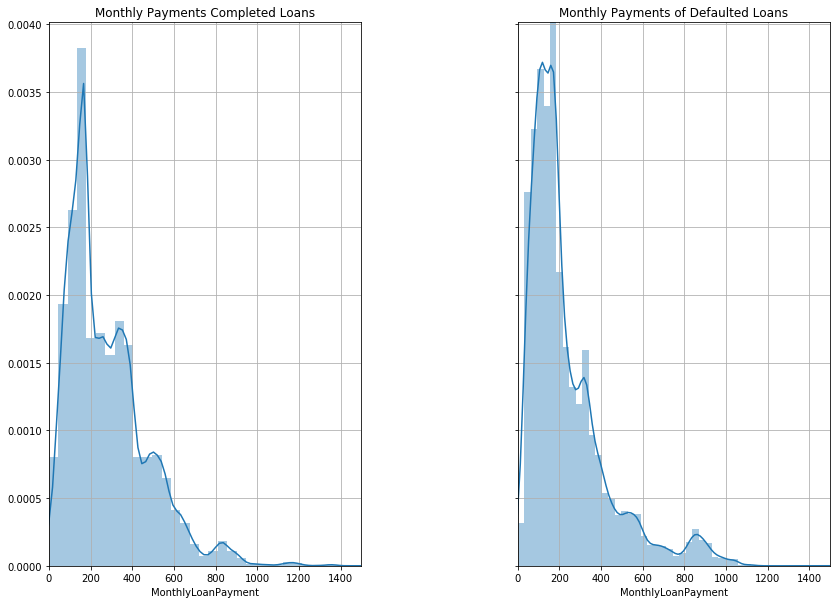

In [106]:
f , ax = plt.subplots(1, 2, sharey = True, sharex = True, figsize = (14, 10))
plt.subplots_adjust(wspace = 0.5);
sns.distplot(df.query("defaults == 0")['MonthlyLoanPayment'], ax = ax[0], label = 'Completed Loans');
sns.distplot(df.query("defaults == 1")['MonthlyLoanPayment'], ax = ax[1], label = 'Defaulted/Charged off Loans');
ax[0].set_xlim(0, 1500);
ax[0].grid();
ax[1].grid();
ax[0].set_title("Monthly Payments Completed Loans");
ax[1].set_title("Monthly Payments of Defaulted Loans");

Comparing the distributions of monthly payments of defaulted and completed loans we find that the completed loans have high kurtosis in its major peak while the defaulted loans have less sharpness containing some outliers around the $200 a month mark.

Now that we have taken a look at some of the top features for prediction we will assign these to our train and test set variables and attempt to run the Decision Tree again.

In [107]:
x_train = x_train[best_feats]
x_test = x_test[best_feats]

In [108]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
train_preds = tree.predict(x_train)
print("Training set accuracy = ", accuracy_score(train_preds, y_train))
test_preds = tree.predict(x_test)
print("Test set accuracy = ", accuracy_score(test_preds, y_test))

Training set accuracy =  1.0
Test set accuracy =  0.8208261389294728


With our top 15 best features we once again achieve 81.9% accuracy. Not great. Though we were able to greatly reduce the model complexity by reducing the number of variables. Due to our target feature being so unevenly distributed accuracy score is not the correct metric for this case. Instead, it would be better to use precision and recall.

$Precision \space Score:\frac{TP} {(TP + FP)}$

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

$Recall \space Score: \frac{TP} {(TP + FN)}$ 

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [110]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

Confusion Matrix is a representation of our True Negative (Upper Left), False Positive (Upper Right), True Positive (Bottom Right) and False Negative (Bottom Left)

In [111]:
confusion_matrix(y_test, test_preds)

array([[17041,  2041],
       [ 2006,  1499]], dtype=int64)

In [112]:
precision_score(y_test, test_preds)

0.42344632768361584

We can interpret our precision score of 0.41 as the model precisely predicted 41.4% of customers that would have completed their loan were not incorrectly labeled as a potential default.

In [113]:
recall_score(y_test, test_preds)

0.4276747503566334

As we now see our decision tree is doing much worse than the original 80% as calculated by our accuracy_score. It is only able to correctly predict a customer will default 42.5% of the time. Let's now expirement with other models and see if we can improve this score. To do so, we will utilize cross validation testing multiple models.

Import models

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import (RandomForestClassifier, 
                              BaggingClassifier, VotingClassifier)
from sklearn.svm import LinearSVC

Assign Models to variables

In [115]:
rfc = RandomForestClassifier()
bagging = BaggingClassifier()
vote = VotingClassifier(estimators = [tree, rfc, bagging])
svc = LinearSVC()

In [116]:
models = [tree, rfc, bagging, svc]
model_names = ["Decision Tree", "Random Forest Classifier", "Bagging", "Support Vector Machine"]

Create function that will iterate over the selected models and run cross validation on each. After which will print out the resulting scores, mean and standard deviation. In the case of the Support Vector Machine we will first normalize the features with Standard Scaler which centers the mean and tranforms them into a range between [-1, 1]

In [117]:
def cross_val(models,x,y):
    
    model_names = ["Decision Tree", "Random Forest Classifier", "Bagging", "Support Vector Machine"]
    count = 0
    plt.figure(figsize = (10, 8))
    for model in models:
        if model == svc:
            from sklearn.preprocessing import StandardScaler
            x = StandardScaler().fit_transform(x)
            
        scores = cross_val_score(model, x, y, scoring = 'recall', cv = 10)
        plt.plot(scores, marker = '.')
    
        print(f"{model_names[count]} Scores:", scores)
        print(f"{model_names[count]} Mean:", scores.mean())
        print(f"{model_names[count]} Standard Deviation:", scores.std())
        count+=1
        
    plt.legend(model_names)
    plt.ylabel("Recall Score")
    plt.title("Cross Validation Scores")
    
    

Decision Tree Scores: [0.42026826 0.4295302  0.45190157 0.41983594 0.41387025 0.4295302
 0.45786726 0.42878449 0.42207308 0.41610738]
Decision Tree Mean: 0.4289768629189908
Decision Tree Standard Deviation: 0.014006207460934304
Random Forest Classifier Scores: [0.29806259 0.29753915 0.31543624 0.30574198 0.28337062 0.29679344
 0.31170768 0.30201342 0.30126771 0.30723341]
Random Forest Classifier Mean: 0.301916624713412
Random Forest Classifier Standard Deviation: 0.008521702027995801
Bagging Scores: [0.30923994 0.31618195 0.33631618 0.31469053 0.32214765 0.30797912
 0.35272185 0.32065623 0.31394482 0.32363908]
Bagging Mean: 0.32175173453091815
Bagging Standard Deviation: 0.012900585326813107
Support Vector Machine Scores: [0.14456036 0.17524236 0.16480239 0.15212528 0.14019389 0.14541387
 0.14317673 0.15809098 0.14988814 0.1715138 ]
Support Vector Machine Mean: 0.15450077849681768
Support Vector Machine Standard Deviation: 0.011746884308619261


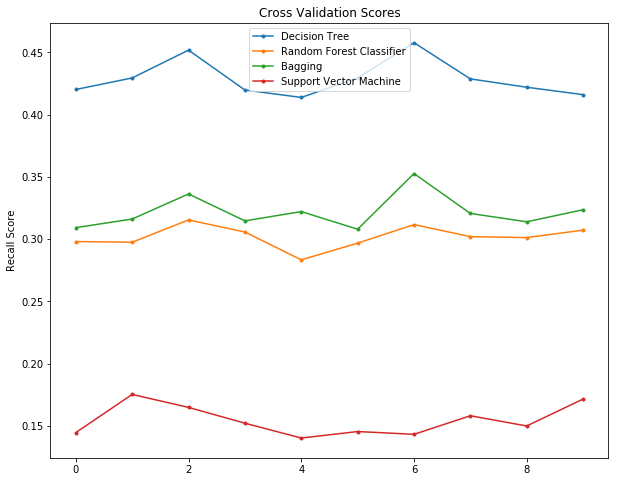

In [118]:
cross_val(models, x_train, y_train)

We can see the DecisionTree is by far the best model (surprisingly). Now lets see how we can optimize its parameters through the use of RandomizedSearchCV. Randomized search is given a dictionary of parameters, each which have a list of various values you would like to try. Similar to GridSearchCV which tries all possible combinations of these parameter settings, RandomSearchCV tries a fixed amount of times and surprisingly does quite well at finding the optimal settings.

In [119]:
from sklearn.model_selection import RandomizedSearchCV

Create a parameter grid of settings which we'd like to expirement with.

In [120]:
param_grid = {'max_depth': [1, 3, 5, 7], 'class_weight': [{0: 0.2, 1: 0.8},{0:0.3, 1:0.7}, {0: 0.4, 1: 0.6}], 'min_samples_leaf': [2,4,6,8,10], 'max_leaf_nodes': [2,4,6,8]}

Call randomized search cross validation using our paramter grid with a maximum of 15 iterations and cross validation of 10.

In [121]:
random_cv = RandomizedSearchCV(tree, param_grid, n_iter = 15, cv = 10, scoring = "recall", return_train_score = True, n_jobs = -1)

In [122]:
random_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'max_depth': [1, 3, 5, 7], 'class_weight': [{0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}], 'min_samples_leaf': [2, 4, 6, 8, 10], 'max_leaf_nodes': [2, 4, 6, 8]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='recall', verbose=0)

In [123]:
random_cv.best_score_

0.8844238729144132

In [124]:
tree = random_cv.best_estimator_
svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [125]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='gini',
            max_depth=7, max_features=None, max_leaf_nodes=8,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [126]:
tree_preds = tree.predict(x_test)

In [127]:
accuracy_score(tree_preds, y_test)

0.7354230309470049

In [128]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [129]:
confusion_matrix(tree_preds, y_test)

array([[13506,   400],
       [ 5576,  3105]], dtype=int64)

In [130]:
precision_score(tree_preds, y_test)

0.8858773181169758

In [131]:
recall_score(tree_preds, y_test)

0.35767768690243057

In [132]:
completed_gain.mean(), default_loss.mean()

(1140.5249487796539, 4485.944010425489)

Calculate estimated losses the model would be able to prevent. (True Negative - False Negative)

In [133]:
estimated_loss_prevention = round(default_loss.mean() * (2863-505))
print("Tree model prevented losses = $", estimated_loss_prevention)

Tree model prevented losses = $ 10577856.0


Calculate estimated gains the model has lost due to false positives

In [134]:
estimated_gains_lost = round(completed_gain.mean() * 5786)
print("Tree model prevented gains = $", estimated_gains_lost)

Tree model prevented gains = $ 6599077.0


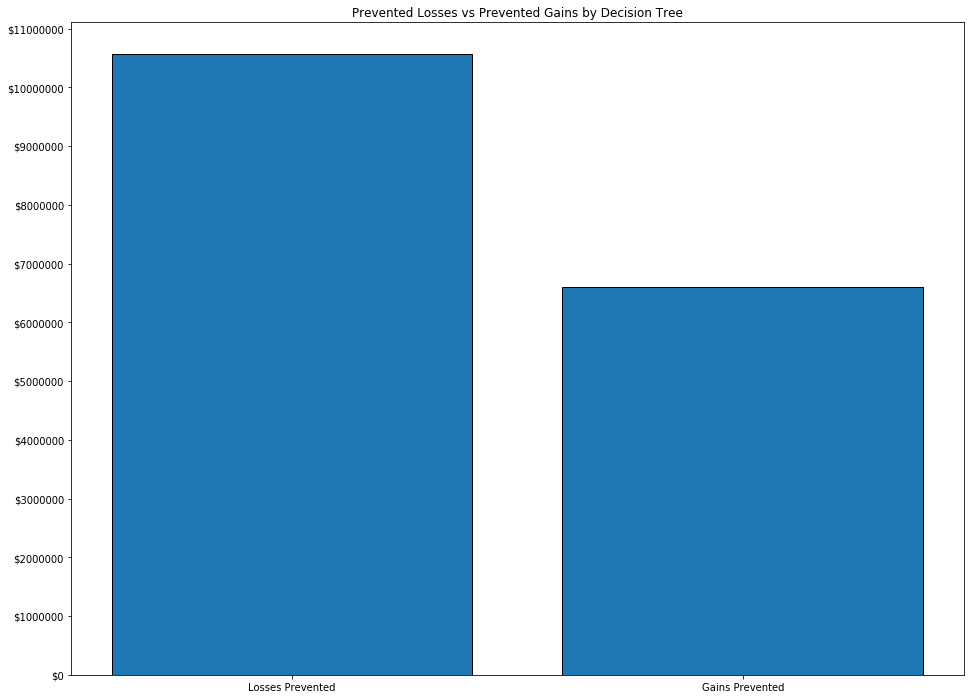

In [135]:
ticks = [i for i in range(0, 12000000, 1000000)]
plt.figure(figsize = (16, 12))
plt.bar(["Losses Prevented", "Gains Prevented"], [estimated_loss_prevention, estimated_gains_lost], edgecolor = 'black');
plt.yticks(ticks, ['$' + str(i)  for i in ticks]);
plt.title("Prevented Losses vs Prevented Gains by Decision Tree");

Though the model is far from perfect with a precision score of only 85%, the decision tree could potentially save the creditor millions of dollars in losses. In order to improve model performance it would be beneficial to have more training data on defaulted customers as the original set only contained around 5% of customers who defaulted.